In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from ipywidgets import interact
import warnings
warnings.filterwarnings("ignore")

In [3]:
!pip install ipywidgets plotly

In [4]:
# Load & Display Netflix Dataset

netflix = r"C:\Users\payal\Downloads\netflix_titles.csv"
netflix_df = pd.read_csv(netflix, low_memory=False)
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [5]:
# Convert .tsv files to .csv files for "title" dataset

tsv_file1 = "title.basics.tsv.gz"
csv_file1 = "title.basics.csv"

title_df = pd.read_csv(tsv_file1, sep="\t", compression="gzip")
title_df.to_csv(csv_file1, index=False)

In [6]:
title_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [7]:
# Convert .tsv files to .csv files for "ratings" dataset

tsv_file2 = "title.ratings.tsv.gz"
csv_file2 = "title.ratings.csv"

ratings_df = pd.read_csv(tsv_file2, sep="\t", compression="gzip")
ratings_df.to_csv(csv_file2, index=False)

In [8]:
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1997
1,tt0000002,5.8,269
2,tt0000003,6.5,1888
3,tt0000004,5.5,178
4,tt0000005,6.2,2672


In [9]:
# Convert "date_added" column to datetime format
netflix_df["date_added"] = pd.to_datetime(netflix_df["date_added"])

In [10]:
# Rename column names according to netflix dataset
title_df.rename(columns={"primaryTitle": "title", "startYear": "release_year"}, inplace=True)

### Merge IMDB "Title" & "Ratings" Dataset

In [11]:
# Merge the dataframes on the 'tconst' column

merged_imdb_df = pd.merge(title_df, ratings_df, on="tconst", how="left")
merged_imdb_df

,tconst,titleType,title,originalTitle,isAdult,release_year,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1997.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",5.8,269.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1888.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",5.5,178.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2672.0
...,...,...,...,...,...,...,...,...,...,...,...
10218114,tt9916848,tvEpisode,Episode #3.17,Episode #3.17,0,2009,\N,\N,"Action,Drama,Family",NaN,NaN
10218115,tt9916850,tvEpisode,Episode #3.19,Episode #3.19,0,2010,\N,\N,"Action,Drama,Family",NaN,NaN
10218116,tt9916852,tvEpisode,Episode #3.20,Episode #3.20,0,2010,\N,\N,"Action,Drama,Family",NaN,NaN
10218117,tt9916856,short,The Wind,The Wind,0,2015,\N,27,Short,NaN,NaN


In [12]:
# Replace all occurrences of '\N' with NaN
merged_imdb_df.replace('\\N', np.nan, inplace=True)

In [13]:
# Convert column "release_year" & "runtimeMinutes" to int datatype 
merged_imdb_df["release_year"] = pd.to_numeric(merged_imdb_df["release_year"], errors="coerce").astype("Int64")
merged_imdb_df["release_year"].fillna(-1, inplace=True)
merged_imdb_df["runtimeMinutes"] = pd.to_numeric(merged_imdb_df["runtimeMinutes"], errors="coerce").astype("Int64")

### Merge the IMDB Dataset with Netflix Dataset

In [14]:
# Merge the merged IMDB dataframe with netflix dataframe on the 'title' & 'type' column

merged_imdb_netflix_df = pd.merge(netflix_df, merged_imdb_df, on=["title", "release_year"])
merged_imdb_netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,tconst,titleType,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,"As her father nears the end of his life, filmm...",tt11394180,movie,Dick Johnson Is Dead,0,NaN,89,"Biography,Documentary,Drama",7.4,7068.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,...,"After crossing paths at a party, a Cape Town t...",tt14810192,short,Blood & Water,0,NaN,<NA>,"Drama,Short",NaN,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,...,To protect his family from a powerful drug lor...,tt13278100,tvSeries,Braqueurs,0,NaN,44,"Action,Crime,Drama",7.2,4228.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,...,"Feuds, flirtations and toilet talk go down amo...",tt15320436,tvSeries,Jailbirds New Orleans,0,NaN,<NA>,"Documentary,Reality-TV",6.6,278.0
4,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,2021-09-24,2021,TV-MA,1 Season,...,The arrival of a charismatic young priest brin...,tt10574558,tvMiniSeries,Midnight Mass,0,2021,450,"Drama,Fantasy,Horror",7.7,129201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10108,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,Looking to survive in a world taken over by zo...,tt3013460,tvEpisode,Zombieland,0,NaN,<NA>,Documentary,NaN,NaN
10109,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,...,Looking to survive in a world taken over by zo...,tt4107428,tvEpisode,Zombieland,0,NaN,<NA>,Comedy,NaN,NaN
10110,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,"Dragged from civilian life, a former superhero...",tt0383060,movie,Zoom,0,NaN,93,"Action,Adventure,Comedy",4.4,22262.0
10111,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,...,"Dragged from civilian life, a former superhero...",tt3610094,tvSeries,Zoom,0,NaN,<NA>,Animation,NaN,NaN


In [15]:
merged_imdb_netflix_df.sort_values(by=["show_id", "numVotes"],ascending=[True,False]).drop_duplicates(subset="show_id")

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,...,description,tconst,titleType,originalTitle,isAdult,endYear,runtimeMinutes,genres,averageRating,numVotes
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,...,"As her father nears the end of his life, filmm...",tt11394180,movie,Dick Johnson Is Dead,0,NaN,89,"Biography,Documentary,Drama",7.4,7068.0
8,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,2021-09-24,2021,PG-13,104 min,...,A woman adjusting to life after a loss contend...,tt5164438,movie,The Starling,0,NaN,102,"Comedy,Drama",6.4,14678.0
113,s100,TV Show,On the Verge,NaN,"Julie Delpy, Elisabeth Shue, Sarah Jones, Alex...","France, United States",2021-09-07,2021,TV-MA,1 Season,...,"Four women — a chef, a single mom, an heiress ...",tt5540990,tvSeries,On the Verge,0,2021,35,Comedy,6.5,3514.0
1309,s1000,Movie,Stowaway,Joe Penna,"Anna Kendrick, Toni Collette, Daniel Dae Kim, ...","Germany, United States",2021-04-22,2021,TV-MA,116 min,...,A three-person crew on a mission to Mars faces...,tt9203694,movie,Stowaway,0,NaN,116,"Adventure,Sci-Fi,Thriller",5.6,50165.0
1310,s1002,Movie,Oloibiri,Curtis Graham,"Olu Jacobs, Richard Mofe-Damijo, William R. Mo...","Canada, Nigeria, United States",2021-04-21,2015,TV-14,86 min,...,"After drilling depletes a small village, a cor...",tt4452274,movie,Oloibiri,0,NaN,110,"Action,Drama,Thriller",5.2,192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,s99,TV Show,Octonauts: Above & Beyond,NaN,"Antonio Aakeel, Chipo Chung, Simon Foster, Ter...",United Kingdom,2021-09-07,2021,TV-Y,1 Season,...,The Octonauts expand their exploration beyond ...,tt15211330,tvSeries,Octonauts: Above & Beyond,0,NaN,25,"Animation,Family",7.1,138.0
1302,s991,Movie,Niyazi Gül Dörtnala,Hakan Algül,"Ata Demirer, Demet Akbağ, Şebnem Bozoklu, Leve...",Turkey,2021-04-23,2015,TV-MA,102 min,...,Seeking the formula behind a magical elixir be...,tt4505260,movie,Niyazi Gül Dörtnala,0,NaN,106,Comedy,4.5,3421.0
1304,s994,TV Show,Shadow and Bone,NaN,"Jessie Mei Li, Archie Renaux, Ben Barnes, Fred...",United States,2021-04-23,2021,TV-14,1 Season,...,Dark forces conspire against orphan mapmaker A...,tt2403776,tvSeries,Shadow and Bone,0,NaN,60,"Action,Adventure,Drama",7.6,109101.0
1305,s995,Movie,This Lady Called Life,Kayode Kasum,"Bisola Aiyeola, Efa Iwara, Molawa Onajobi, Tin...",Nigeria,2021-04-23,2020,TV-14,120 min,...,"Abandoned by her family, young single mother A...",tt12282600,movie,This Lady Called Life,0,NaN,120,Drama,7.4,73.0


In [16]:
merged_imdb_netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10113 entries, 0 to 10112
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   show_id         10113 non-null  object        
 1   type            10113 non-null  object        
 2   title           10113 non-null  object        
 3   director        7885 non-null   object        
 4   cast            9379 non-null   object        
 5   country         9502 non-null   object        
 6   date_added      10109 non-null  datetime64[ns]
 7   release_year    10113 non-null  int64         
 8   rating          10111 non-null  object        
 9   duration        10110 non-null  object        
 10  listed_in       10113 non-null  object        
 11  description     10113 non-null  object        
 12  tconst          10113 non-null  object        
 13  titleType       10113 non-null  object        
 14  originalTitle   10113 non-null  object        
 15  is

### Que 1: Create a bar chart visualization to emphasize the influence of directors on Netflix based on their highest IMDb ratings.

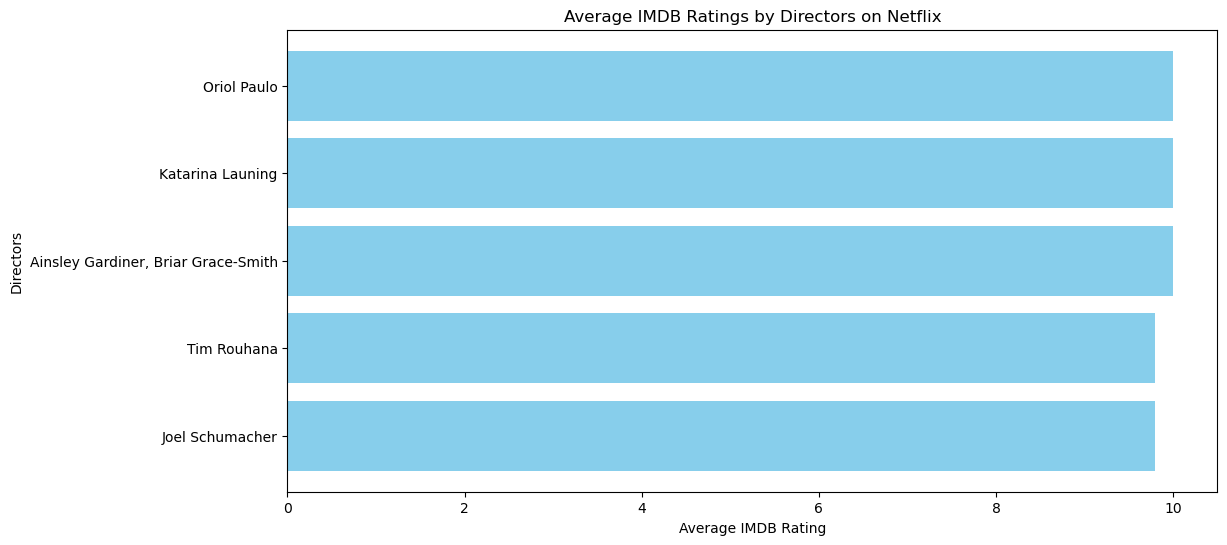

In [25]:
# Filter out rows with NaN IMDb ratings
filtered_df = merged_imdb_netflix_df.dropna(subset=["averageRating", "director"])

# Sort the rating with highest values
filtered_df = filtered_df.sort_values(by="averageRating", ascending=False)

# Create a bar chart to visualize the genres with the highest IMDb ratings
plt.figure(figsize=(12,6))
plt.barh(filtered_df["director"].head(5), filtered_df["averageRating"].head(5), color="skyblue")
plt.title("Average IMDB Ratings by Directors on Netflix")
plt.xlabel("Average IMDB Rating")
plt.ylabel("Directors")
plt.gca().invert_yaxis()  # Reverse the order to show the highest ratings at the top
plt.show()

In [ ]:
# Insight: The above bar graph shows the top 5 directors based on the avg. Rating. It implies that avg rating of directors is 10.

### Que 2: Generate Grouped bar chart of Top 15 genres for the following: (A) Movies (B) TV shows

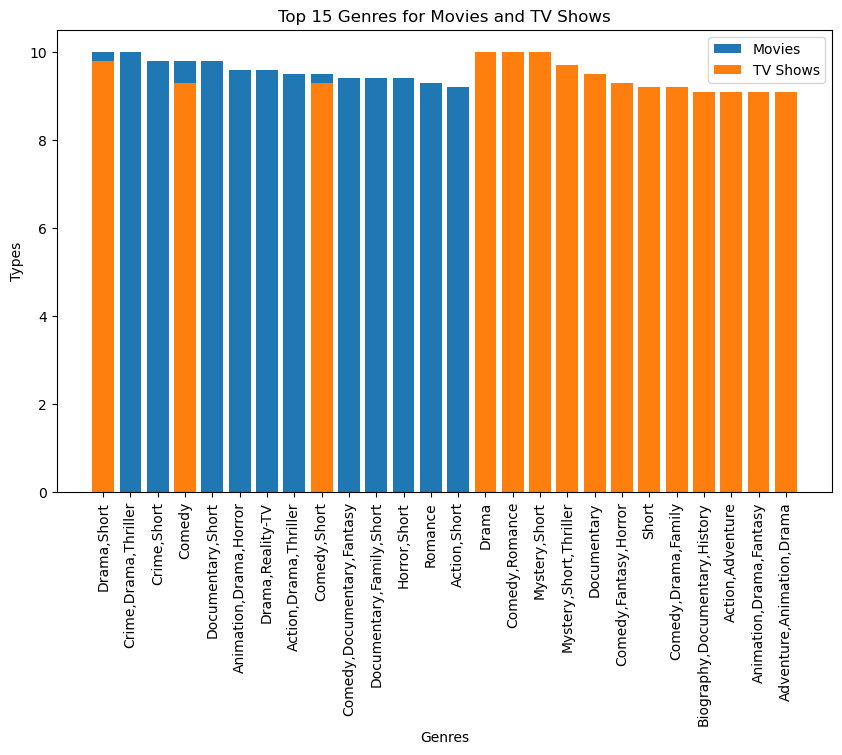

In [36]:
# Get the top 15 genres for movies and TV shows
filtered_df = merged_imdb_netflix_df.dropna(subset=["type", "genres", "averageRating"])

movies_data = filtered_df[filtered_df["type"] == "Movie"].groupby("genres")["averageRating"].max().sort_values(ascending=False).head(15)
tv_shows_data = filtered_df[filtered_df["type"] == "TV Show"].groupby("genres")["averageRating"].max().sort_values(ascending=False).head(15)

# Create a grouped bar chart for movies
plt.figure(figsize=(10, 6))
plt.bar(movies_data.index, movies_data.values, label="Movies")
plt.bar(tv_shows_data.index, tv_shows_data.values, label="TV Shows")
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Types")
plt.title("Top 15 Genres for Movies and TV Shows")
plt.legend()
plt.show()

### Que 3: Create a line chart to see if there are any trends in IMDb ratings based on the year of release for Netflix title.

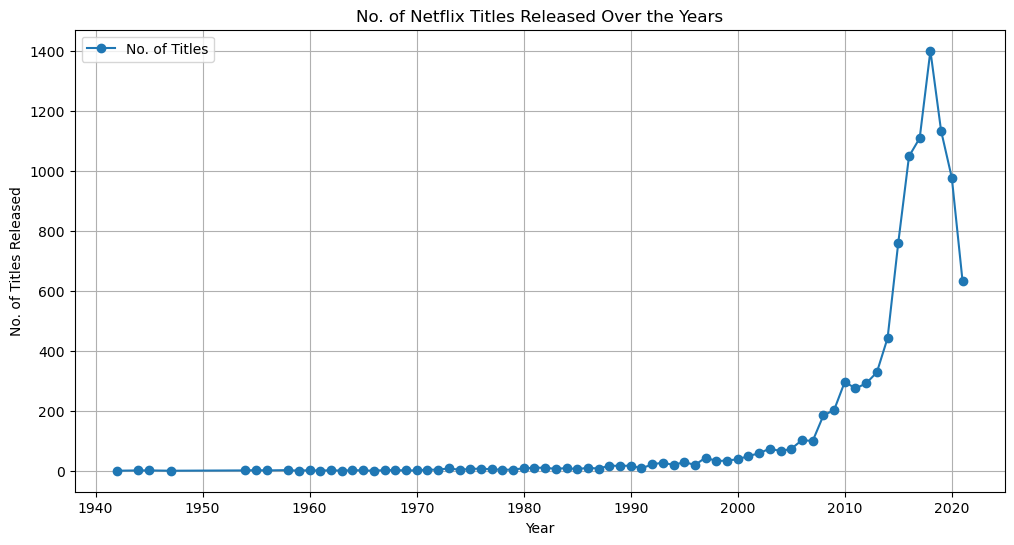

In [37]:
# Group the data by release year and calculate the count of titles released in each year
yearly_counts = merged_imdb_netflix_df["release_year"].value_counts().reset_index()
yearly_counts.columns = ["Year", "Title Count"]

# Sort the data by year in ascending order
yearly_counts = yearly_counts.sort_values(by="Year")

# Create a line plot to visualize the number of Netflix titles released over the years
plt.figure(figsize=(12, 6))
plt.plot(yearly_counts["Year"], yearly_counts["Title Count"], marker="o", linestyle="-")
plt.title("No. of Netflix Titles Released Over the Years")
plt.xlabel("Year")
plt.ylabel("No. of Titles Released")

plt.legend(["No. of Titles"])
plt.grid(True)
plt.show()

### Que 4: Create an interactive bar chart that displays the distribution of content by Top 10 countries.

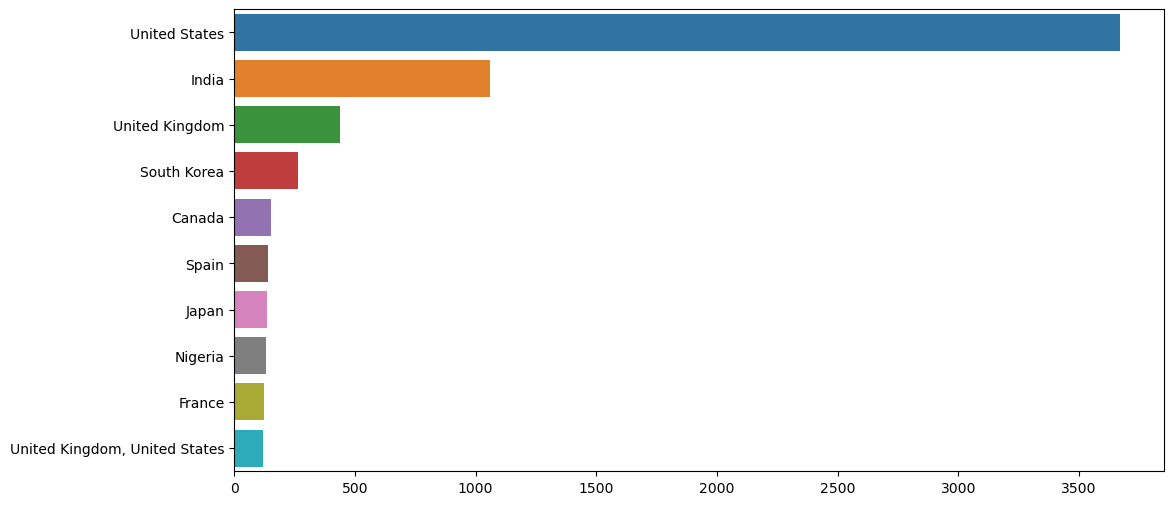

In [42]:
# Filter out top 10 countries based on number of content available
filtered_df = merged_imdb_netflix_df.dropna(subset=["type", "country"])

top_10_countries = filtered_df["country"].value_counts().nlargest(10)

# Create horizontal bar chart using seaborn
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index)

# Add interactivity to chart using Plotly
fig = px.bar(merged_imdb_netflix_df, x="type", y="country", title="Distribution of Content by Top 10 Countries")
fig.show()

### Que 5: Create violin plots to show the distribution of IMDb ratings for Top 15 genres.

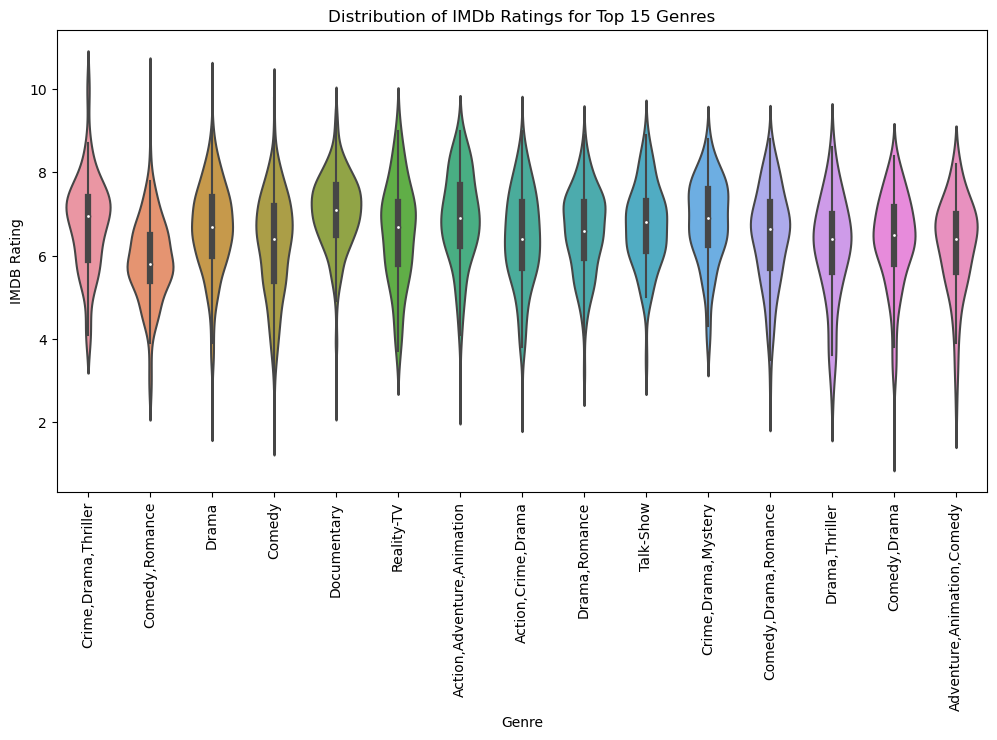

In [44]:
# Filter out data for top 15 genres

filtered_df = merged_imdb_netflix_df.dropna(subset=["genres", "averageRating"])

top_15_genres = filtered_df["genres"].value_counts().nlargest(15)
filtered_df = filtered_df[filtered_df["genres"].isin(top_15_genres.index)]

# Create violin plots using seaborn
plt.figure(figsize=(12,6))
sns.violinplot(x="genres", y="averageRating", data=filtered_df)

plt.title("Distribution of IMDb Ratings for Top 15 Genres")
plt.xlabel("Genre")
plt.ylabel("IMDB Rating")
plt.xticks(rotation=90)
plt.show()

### Que 6: (a) Create a distribution plot using seaborn for comparing the length of movies. (b) Create a distribution plot using seaborn for comparing the length of tv shows.

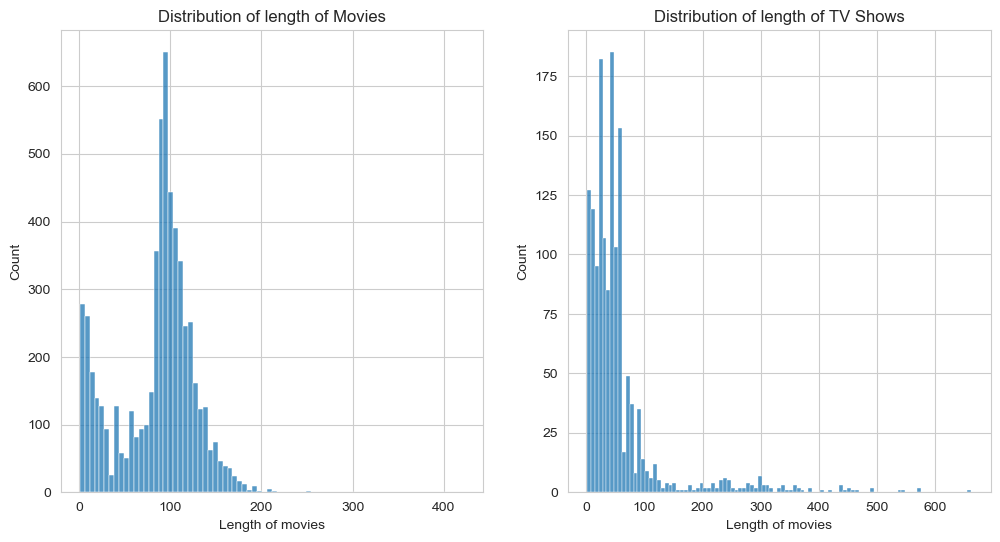

In [59]:
# Create distribution plot using seaborn
filtered_df = merged_imdb_netflix_df.dropna(subset=["runtimeMinutes", "type"])

movie_data = filtered_df[filtered_df['type']=='Movie']
tvshow_data = filtered_df[filtered_df['type']=='TV Show']

fig, axis = plt.subplots(1,2, figsize=(12,6))
sns.histplot(movie_data[movie_data['runtimeMinutes']!=0],x='runtimeMinutes',ax=axis[0]).set(title='Distribution of length of Movies',xlabel='Length of movies')
sns.histplot(tvshow_data[tvshow_data['runtimeMinutes']!=0],x='runtimeMinutes',ax=axis[1]).set(title='Distribution of length of TV Shows',xlabel='Length of movies')

plt.show()

### Que 7: Create a scatter plot to visualize movie duration over the years.

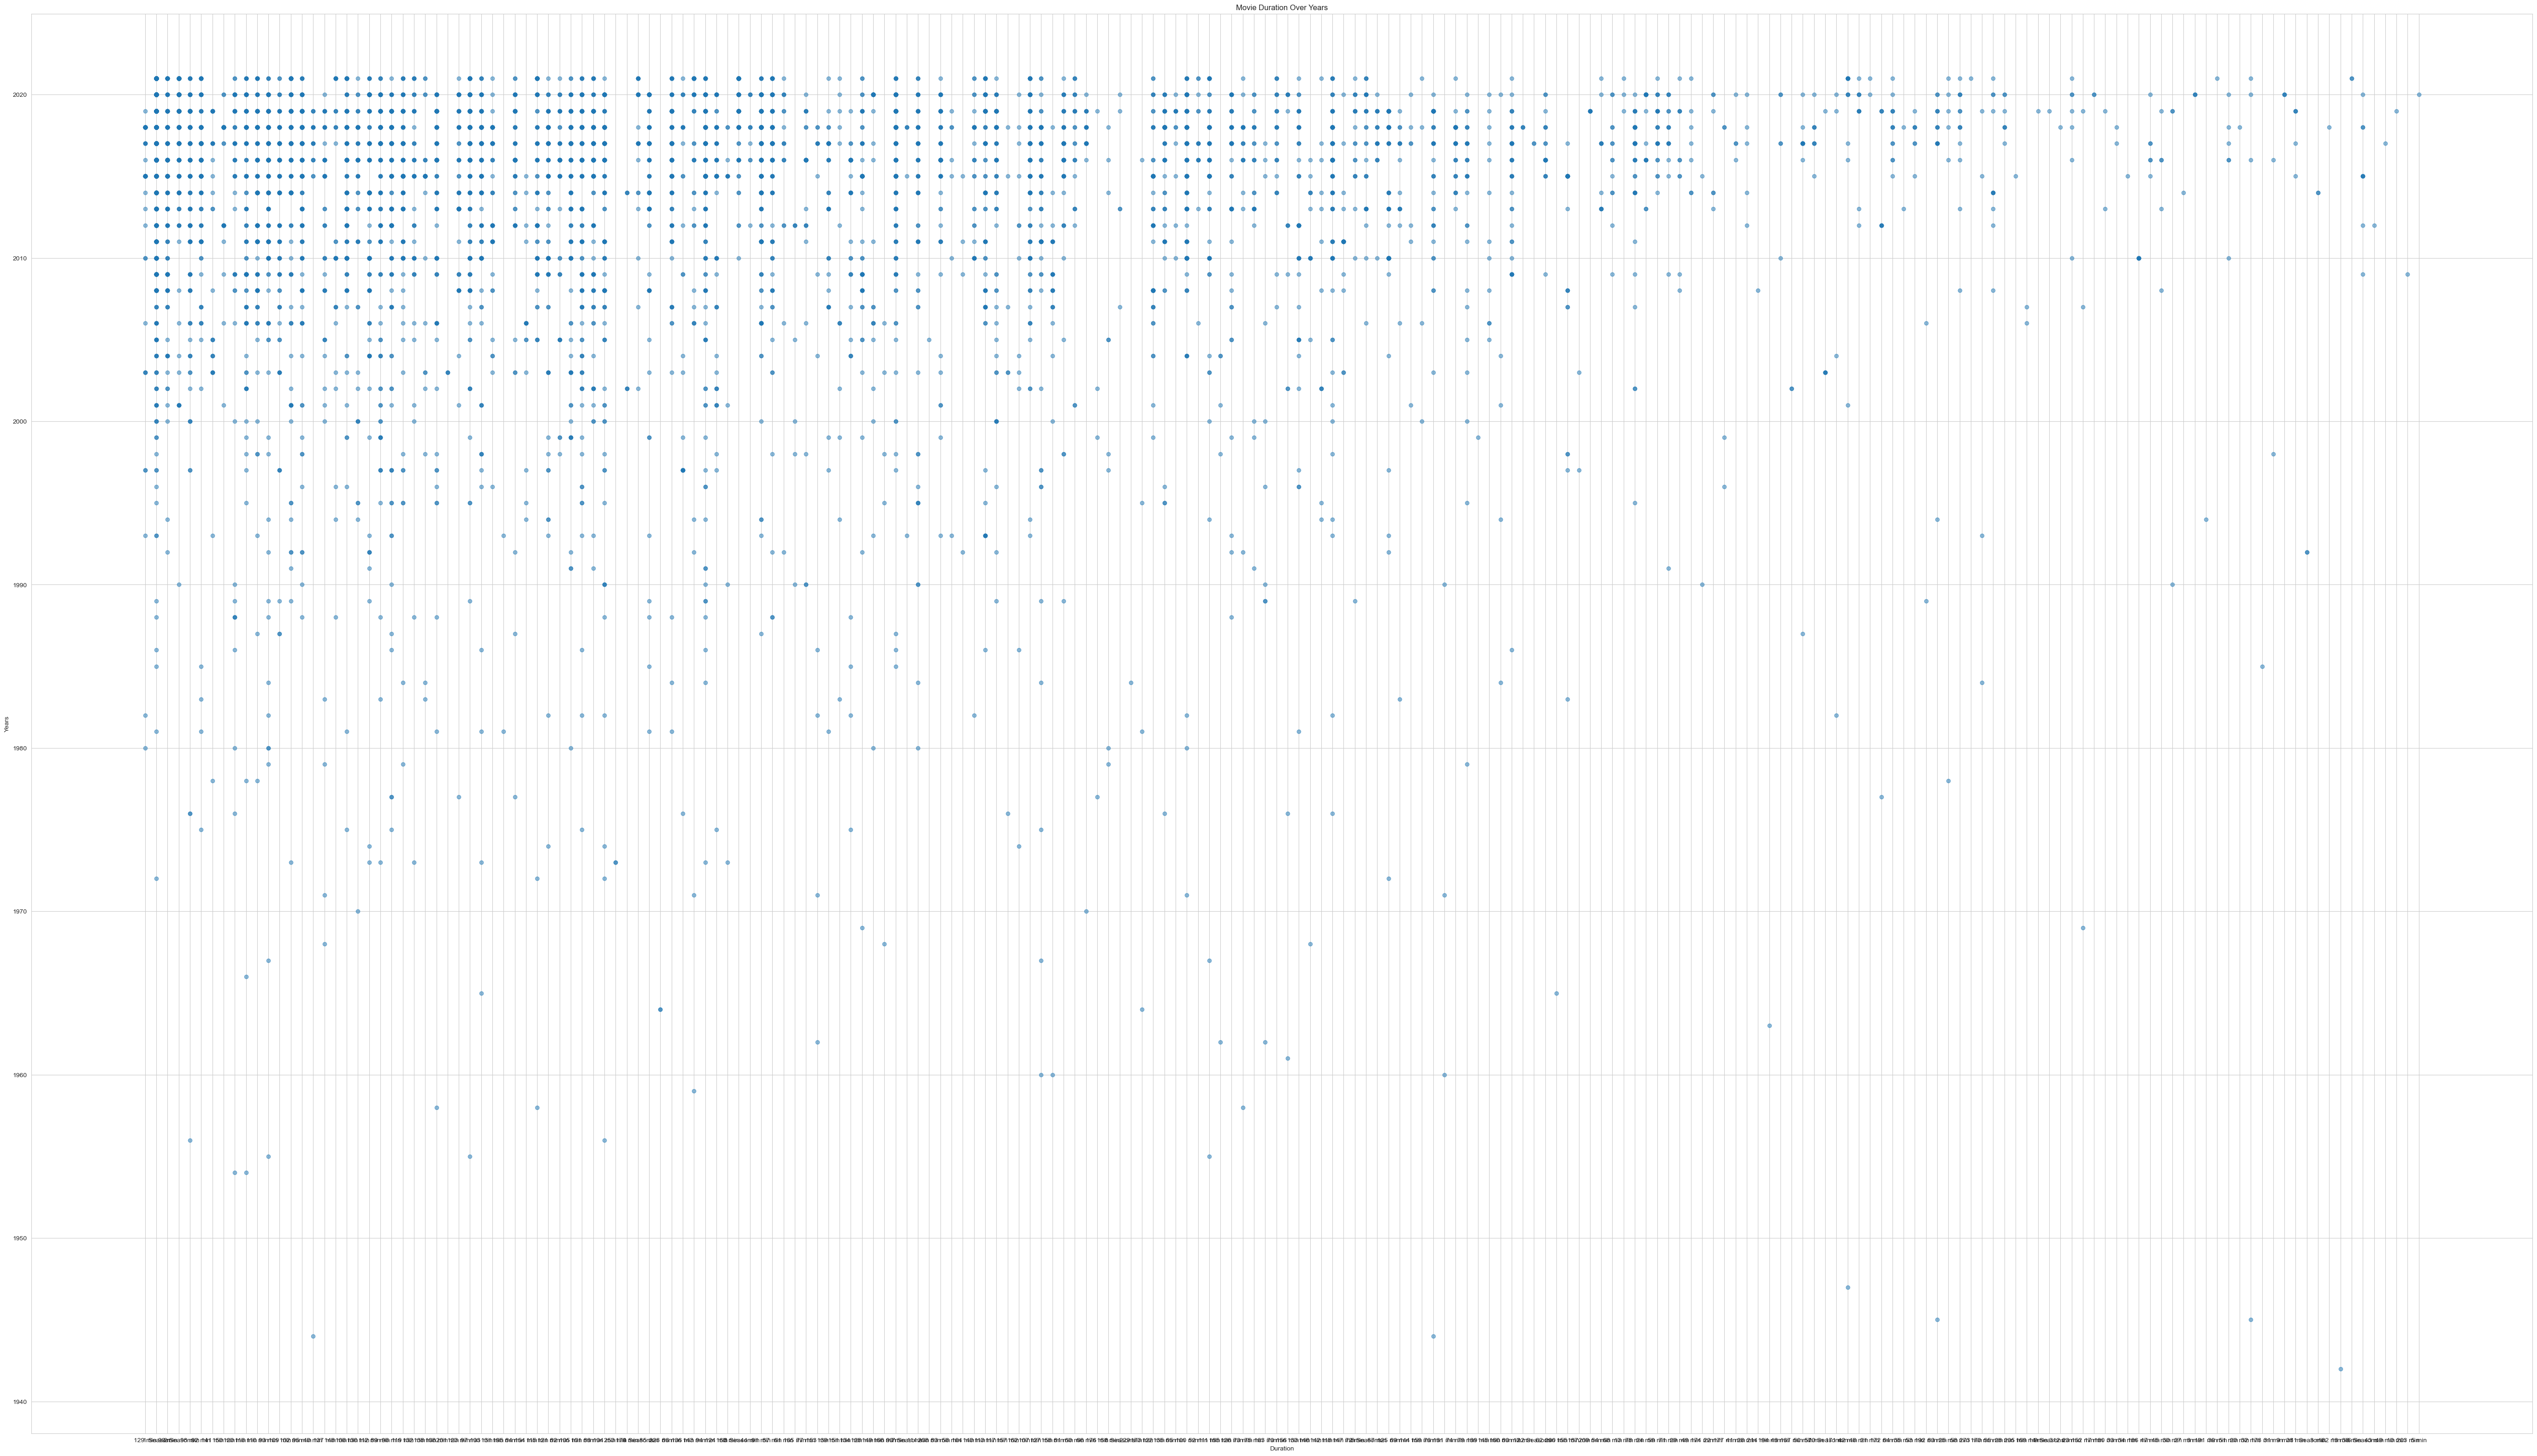

In [51]:
# Filter out rows with missing duration & release year
filtered_df = merged_imdb_netflix_df.dropna(subset=["duration", "release_year"])

# Create a scatterplot to investigate the correlation
plt.figure(figsize=(70,40))
plt.scatter(filtered_df["duration"], filtered_df["release_year"], alpha=0.5)
plt.title("Movie Duration Over Years")
plt.xlabel("Duration")
plt.ylabel("Years")
plt.grid(True)
plt.show()

### Que 8: Generate a box plot that shows the distribution of IMDB ratings for Netflix titles grouped by release year.

In [54]:
# Check summary statistics of the 'averageRating' column
filtered_df = merged_imdb_netflix_df.dropna(subset=["averageRating", "title", "release_year"])
imdb_ratings = filtered_df.groupby("release_year")["averageRating"].mean().reset_index()


# Create a box plot to visualize the distribution of IMDb ratings
#plt.figure(figsize=(10, 6))
#sns.boxplot(x=filtered_df["averageRating"])
#plt.title("Distribution of IMDB Ratings for TV Shows on Netflix")
#plt.xlabel("IMDB Rating")
#plt.show()

plt.figure(figsize=(12,6))
fig = px.box(filtered_df, x="release_year", y="averageRating",
             title="Distribution of Netflix Titles' IMDb Ratings by Year of Release",
             width=1000, height=500)

fig.update_xaxes(dtick=1)
fig.update_yaxes(title_text='IMDb. Rating')

fig.show()

<Figure size 1200x600 with 0 Axes>

### Que 9: Create a visualization (Plot is your choice) for Top 10 directors who involved in the greatest number of content.

In [56]:
filtered_df = merged_imdb_netflix_df.dropna(subset=["director", "title"])

top_director = filtered_df.groupby('director',as_index=False)['title'].count().sort_values('title', ascending=False).head(10)
fig = px.bar(top_director,x='director',y='title',labels={'title':'Number of Content'},title='Top 10 directors who involved in the greatest number of content')
fig.show()

### Que 10: Create a visual timeline that illustrates the growth of Netflix content over the years. This timeline should allow users to hover over each year to view the number of titles added in that year.

In [58]:
filtered_df = merged_imdb_netflix_df.dropna(subset=["release_year", "title"])

movies_release_years = filtered_df.groupby('release_year',as_index=False).count().sort_values('release_year').query("release_year!=0")
px.line(movies_release_years,x='release_year',y='title',labels={'title':'Number of movies'},title='Growth of number of movies over years')